In [ ]:
![Doc](resources/QFT.png)

# BELL States

https://quantumcomputing.stackexchange.com/questions/2258/how-to-implement-the-4-bell-states-on-the-ibm-q-composer

https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

https://en.wikipedia.org/wiki/Bell_state

![Doc](resources/Bell_def.png)
![Doc](resources/Bell-impl.png)

In [54]:
from qiskit import QuantumCircuit, Aer, assemble, transpile, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector,  plot_state_city, plot_state_hinton,plot_state_qsphere, plot_state_paulivec
from qiskit.visualization import array_to_latex

In [68]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Statevector

In [27]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

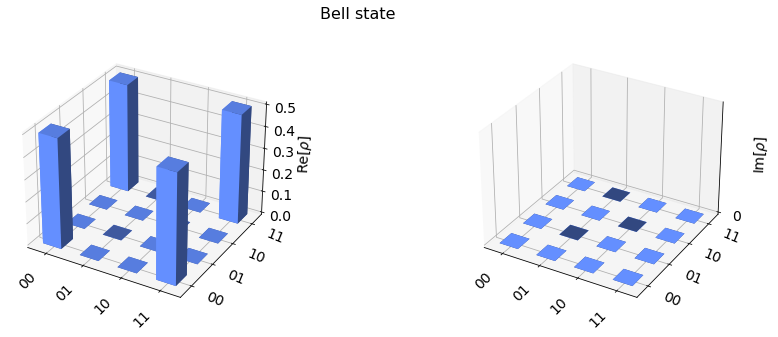

In [35]:
plot_state_city(final_state, title='Bell state')

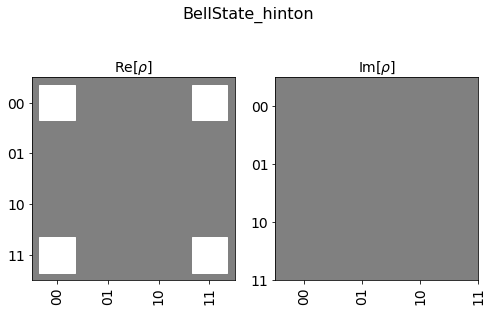

In [38]:
plot_state_hinton(final_state, title="BellState_hinton")

/Users/iuliazidaru/opt/anaconda3/envs/qiskit-certification-resources/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


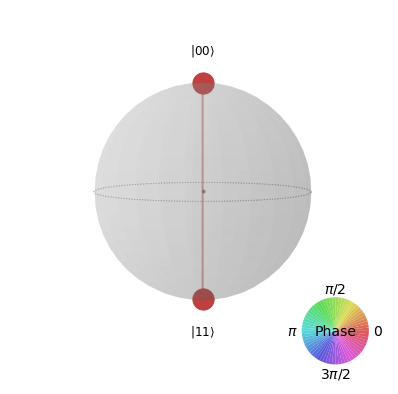

In [40]:
plot_state_qsphere(final_state)

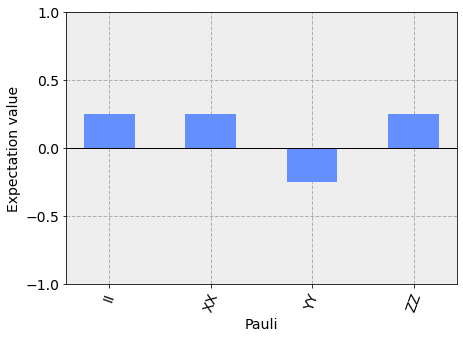

In [42]:
plot_state_paulivec(final_state)

/Users/iuliazidaru/opt/anaconda3/envs/qiskit-certification-resources/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


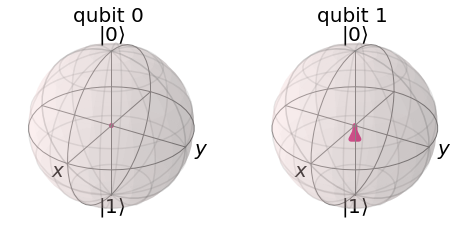

In [43]:
plot_bloch_multivector(final_state)

Unitary

In [49]:
#must run circuit cell again
qc.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary.round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


In [69]:
backend = Aer.get_backend('qasm_simulator')# the device to run on
result = execute(qc, backend, shots=1000).result()
print(result)
counts  = result.get_counts(qc)

print(counts)


#plot_histogram(counts)

Result(backend_name='qasm_simulator', backend_version='0.8.1', qobj_id='801896d1-693b-4dd8-9b37-adbaaca83aa2', job_id='8b4881b6-9b99-4311-9768-d37ed7956d1d', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=2, name='circuit-116', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2512462242, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'measure_sampling': True, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.00031329400000000004)], date=2021-07-30T15:57:27.565300, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.1'), metadata={'mpi_rank': 0, 'time_taken': 0.0007607800000000001, 'max_gpu_memory_mb': 0, 'max_memory_mb': 16384, 'parallel_experiments': 1, 'num_mpi_processes': 1, 'omp_enabl

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x13a506880>"'